In [1]:
import pandas as pd
import sys; sys.path.insert(0, '..')
from stattest import Analysis
from clustering import ClusteringPipe

df = pd.read_csv('data_processed.csv').sample(10000)
Class, User = pd.Categorical(df.Class),  pd.Categorical(df.User)
y = pd.DataFrame({'class':Class.codes, 'user':User.codes})
x_raw = df.drop([ 'Class', 'User'], axis=1)

data = ClusteringPipe(x_raw, y)

<AxesSubplot:>

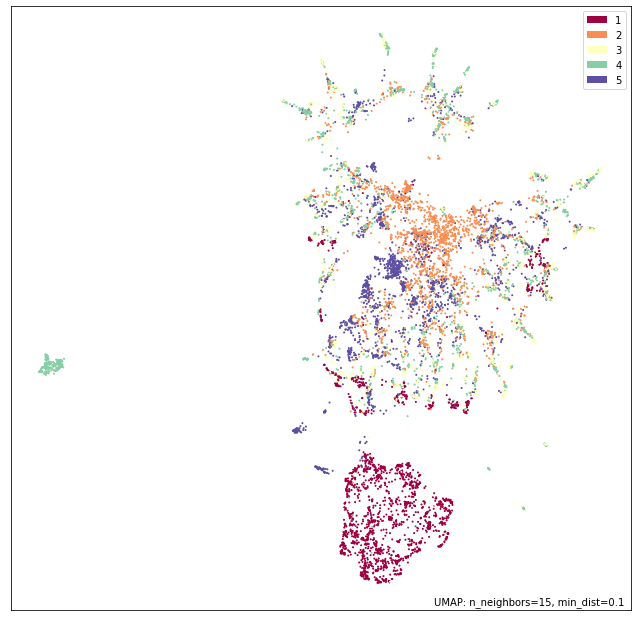

In [2]:
import umap
import umap.plot


mapper = umap.UMAP().fit(x_raw.iloc[:,:21])
umap.plot.points(mapper, labels=Class)

## K-Means

### outlires removal

In [3]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=30) \
                    .cluster('kmeans', n_clusters=7, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

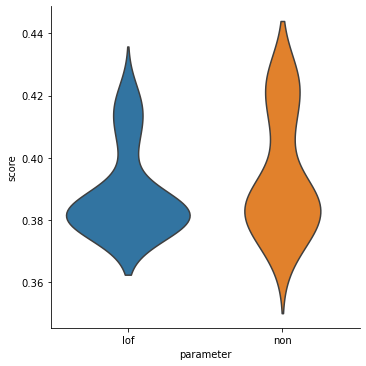

In [4]:
results.plot()

In [5]:
results.mean()

lof    0.388643
non    0.394381
dtype: float64

In [6]:
results.annova()

(1.785945176528264, 0.18664027600529873)

### dimension reduction method

In [7]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce(p, n_components=5, random_state=i) \
                    .cluster('kmeans', n_clusters=7, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['pca', 'umap']})

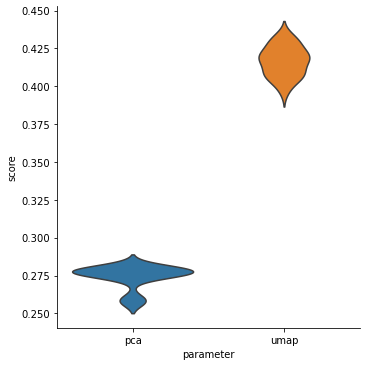

In [8]:
results.plot()

### number of clusters

detect potentially good k values with the elbow mehtod:

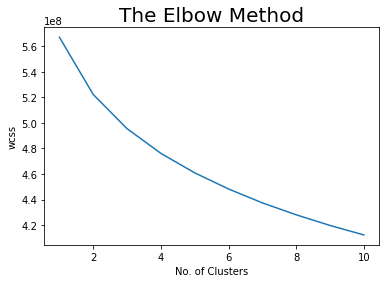

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x_raw)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

now we will test which one is the best using the full process

In [10]:
results = Analysis({k:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=5) \
                    .cluster('kmeans', n_clusters=k, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for k in [4,5,6,7]})

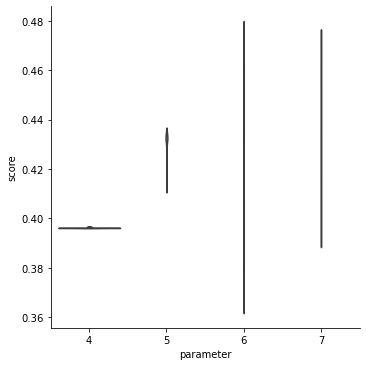

In [11]:
results.plot()

In [12]:
results.mean()

4    0.396206
5    0.431617
6    0.420996
7    0.417332
dtype: float64

In [13]:
results.annova()

(24.290708942489275, 2.8623995501033937e-12)

In [14]:
results.scheffe()

,4,5,6,7
4,1.000000e+00,9.102060e-12,0.000001,0.000054
5,9.102060e-12,1.000000e+00,0.107762,0.012999
6,1.494712e-06,1.077622e-01,1.000000,0.863684
7,5.388248e-05,1.299898e-02,0.863684,1.000000


### visualize cluster

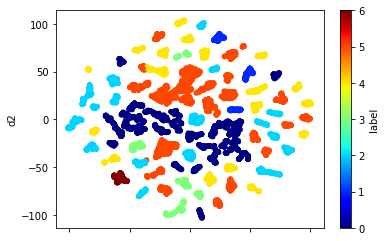

In [15]:
data.normalize('std') \
    .remove_outlires('lof') \
    .reduce('umap', n_components=5) \
    .cluster('kmeans', n_clusters=7) \
    .visualize('tsne')

### corelationg with target class

In [18]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('kmeans', n_clusters=2) \
    .score('v', label='user')

0.0559881844025377

In [190]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('kmeans', n_clusters=5) \
    .score('v', label='class')

0.2668842347672682

## GMM

### outlires removal

In [21]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=30) \
                    .cluster('gmm', n_components=6, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

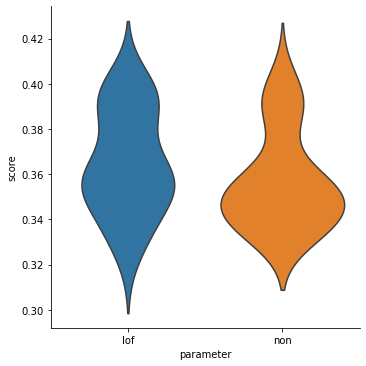

In [22]:
results.plot()

In [23]:
results.mean()

lof    0.364946
non    0.356944
dtype: float64

In [24]:
results.annova()

(1.9348866742847044, 0.1695382773914739)

### Dimension Reduction Method

In [25]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .reduce(p, n_components=30, random_state=i) \
                    .cluster('gmm', n_components=6, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['pca', 'umap', 'non']})

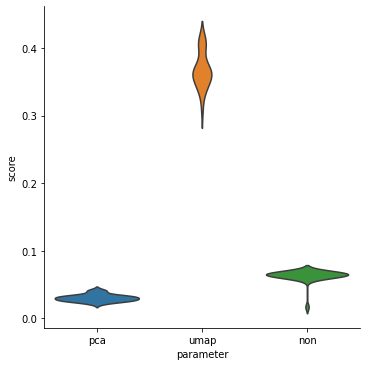

In [26]:
results.plot()

### Number of dimensions

In [27]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .reduce('umap', n_components=p, random_state=i) \
                    .cluster('gmm', n_components=6, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [5,10,20,30]})

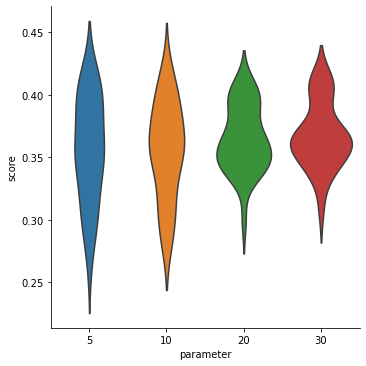

In [28]:
results.plot()

In [29]:
results.mean()

5     0.356470
10    0.355209
20    0.364878
30    0.367638
dtype: float64

In [30]:
results.annova()

(0.9813312207464862, 0.40416973355973373)

In [31]:
results.scheffe()

,5,10,20,30
5,1.000000,0.999208,0.820612,0.655268
10,0.999208,1.000000,0.749380,0.572183
20,0.820612,0.749380,1.000000,0.991899
30,0.655268,0.572183,0.991899,1.000000


### Coveriance Type

In [32]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .reduce('umap', n_components=5) \
                    .cluster('gmm', n_components=6, covariance_type=p, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['spherical', 'tied', 'diag', 'full']
})

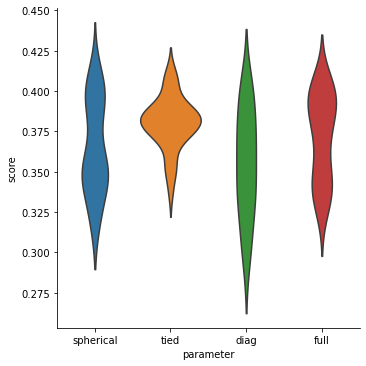

In [33]:
results.plot()

In [34]:
results.mean()

spherical    0.365002
tied         0.380392
diag         0.355030
full         0.371270
dtype: float64

In [35]:
results.annova()

(4.659943738902597, 0.00411506218061225)

In [36]:
results.scheffe()

,spherical,tied,diag,full
spherical,1.000000,0.189402,0.566844,0.848325
tied,0.189402,1.000000,0.005782,0.637257
diag,0.566844,0.005782,1.000000,0.151123
full,0.848325,0.637257,0.151123,1.000000


### number of clusters

detect potentially good k values with the elbow mehtod:

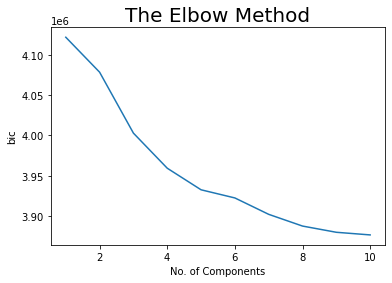

In [37]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

bic = []
for i in range(1, 11):
    gmm = GaussianMixture(n_components = i)
    gmm.fit(x_raw)
    bic.append(gmm.bic(x_raw))
    
plt.plot(range(1, 11), bic)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Components')
plt.ylabel('bic')
plt.show()

now we will test which one is the best using the full process

In [38]:
results = Analysis({k:[ \
                data.normalize('std') \
                    .reduce('umap', n_components=30) \
                    .cluster('gmm', n_components=k, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for k in [3,4,5,6,7,8]})

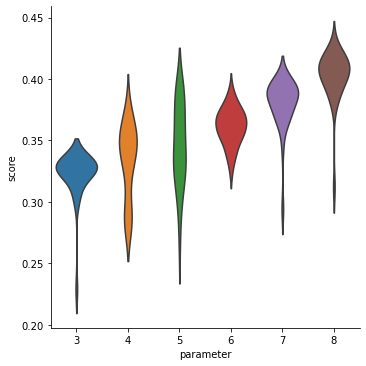

In [39]:
results.plot()

In [40]:
results.mean()

3    0.322354
4    0.333166
5    0.346706
6    0.361450
7    0.380195
8    0.402762
dtype: float64

In [41]:
results.annova()

(47.40230761230337, 9.209013778282253e-31)

In [42]:
results.scheffe()

,3,4,5,6,7,8
3,1.000000e+00,6.903324e-01,1.031653e-02,8.082721e-07,4.802942e-14,4.512482e-24
4,6.903324e-01,1.000000e+00,4.434153e-01,1.271181e-03,1.126393e-09,3.517593e-19
5,1.031653e-02,4.434153e-01,1.000000e+00,3.414658e-01,4.804137e-05,2.706423e-13
6,8.082721e-07,1.271181e-03,3.414658e-01,1.000000e+00,1.071745e-01,1.403592e-07
7,4.802942e-14,1.126393e-09,4.804137e-05,1.071745e-01,1.000000e+00,2.369348e-02
8,4.512482e-24,3.517593e-19,2.706423e-13,1.403592e-07,2.369348e-02,1.000000e+00


### Cluster visualisation 

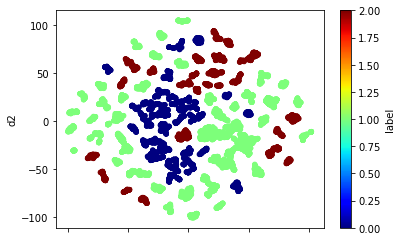

In [43]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('gmm', n_components=3) \
    .visualize('tsne')

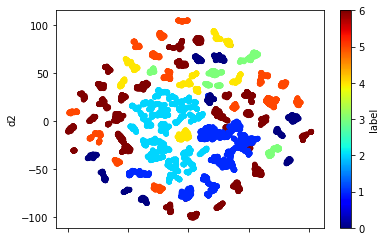

In [44]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('gmm', n_components=7) \
    .visualize('tsne')

### corelationg with target class

In [45]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('gmm', n_components=2) \
    .score('v', label='user')

0.05175541140785386

In [196]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('gmm', n_components=4) \
    .score('v', label='class')

0.3187920665122318

## Louvaine

### outlires removal

In [47]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=5, random_state=i) \
                    .cluster('louvain', random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

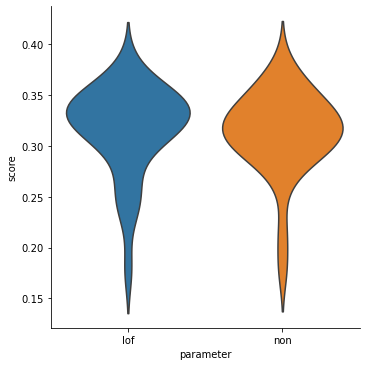

In [48]:
results.plot()

In [49]:
results.mean()

lof    0.316534
non    0.312761
dtype: float64

In [50]:
results.annova()

(0.12071815623769774, 0.7295145768578815)

### Dimension Reduction Method

In [51]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce(p, n_components=10, random_state=i) \
                    .cluster('louvain') \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['pca', 'umap', 'non']})

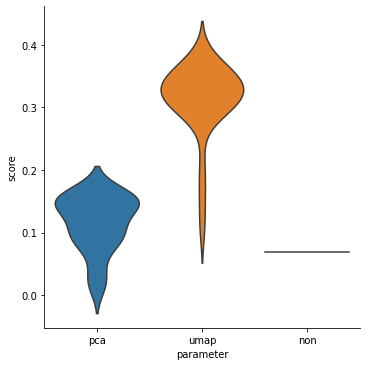

In [52]:
results.plot()

### Number of dimensions

In [116]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=p, random_state=i) \
                    .cluster('louvain', random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [5,10,15, 20]})

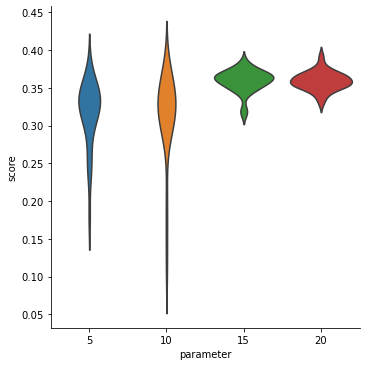

In [117]:
results.plot()

In [118]:
results.mean()

5     0.316534
10    0.312932
15    0.359367
20    0.359119
dtype: float64

In [119]:
results.annova()

(14.226068043123487, 5.889096319105414e-08)

In [120]:
results.scheffe()

,5,10,15,20
5,1.000000,0.986674,0.000387,0.000425
10,0.986674,1.000000,0.000096,0.000106
15,0.000387,0.000096,1.000000,0.999996
20,0.000425,0.000106,0.999996,1.000000


### Modularity Type

In [ ]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=15, random_state=i) \
                    .cluster('louvain', modularity=p, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['dugue', 'newman', 'potts']
})

In [ ]:
results.plot()

In [ ]:
results.mean()

In [ ]:
results.annova()

### Cluster visualisation 

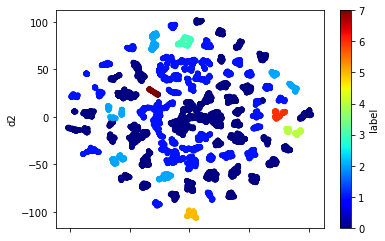

In [123]:
data.normalize('std') \
    .remove_outlires('lof') \
    .reduce('umap', n_components=15) \
    .cluster('louvain', modularity='potts') \
    .visualize('tsne')

### corelationg with target class

In [124]:
data.normalize('std') \
    .reduce('umap', n_components=15) \
    .cluster('louvain', modularity='newman') \
    .score('v', label='user')

0.057080610062529305

In [125]:
data.normalize('std') \
    .reduce('umap', n_components=15) \
    .cluster('louvain', modularity='newman') \
    .score('v', label='class')

0.21030620484742713

## Prim

### outlires removal

In [129]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=15, random_state=i) \
                    .cluster('prim', cutoff_scale=0.8) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

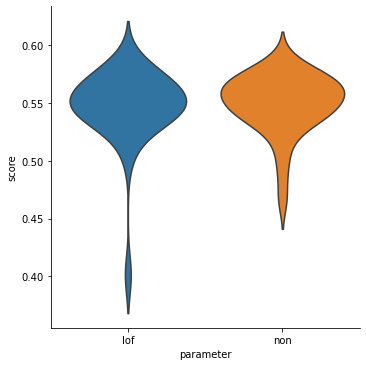

In [130]:
results.plot()

In [131]:
results.mean()

lof    0.546892
non    0.549562
dtype: float64

In [132]:
results.annova()

(0.12359444133511222, 0.7264422634684916)

### Dimension Reduction Method

In [133]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce(p, n_components=40, random_state=i) \
                    .cluster('prim', cutoff_scale=2) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['pca', 'umap', 'non']})

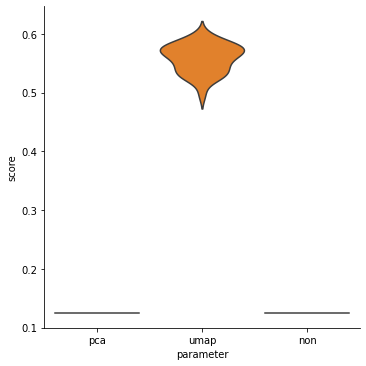

In [134]:
results.plot()

### Number of dimensions

In [135]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=p, random_state=i) \
                    .cluster('prim', cutoff_scale=2) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [5, 10, 15, 20, 30, 40]})

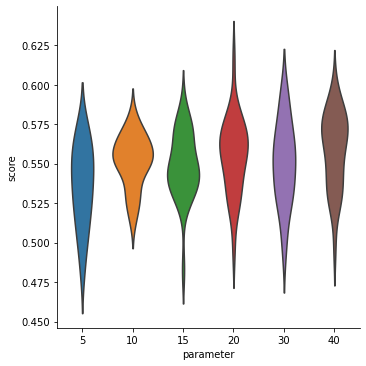

In [136]:
results.plot()

In [137]:
results.mean()

5     0.536599
10    0.551554
15    0.548934
20    0.555005
30    0.550488
40    0.558412
dtype: float64

In [138]:
results.annova()

(3.119237573987016, 0.010093268795110645)

In [139]:
results.scheffe()

,5,10,15,20,30,40
5,1.000000,0.287837,0.515819,0.097732,0.374122,0.024108
10,0.287837,1.000000,0.999183,0.996924,0.999990,0.932790
15,0.515819,0.999183,1.000000,0.959610,0.999937,0.774365
20,0.097732,0.996924,0.959610,1.000000,0.989152,0.997108
30,0.374122,0.999990,0.999937,0.989152,1.000000,0.881128
40,0.024108,0.932790,0.774365,0.997108,0.881128,1.000000


### Cutoff Scale

In [140]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=40, random_state=i) \
                    .cluster('prim', cutoff_scale=p) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [0.6, 0.7, 0.8, 0.9]
})

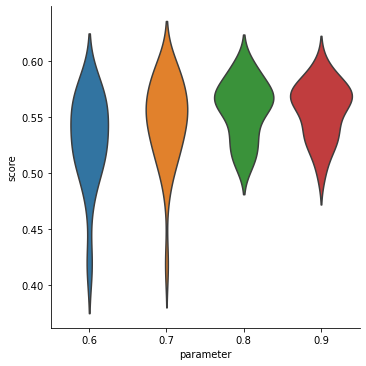

In [141]:
results.plot()

In [142]:
results.mean()

0.6    0.529580
0.7    0.546881
0.8    0.557168
0.9    0.556023
dtype: float64

In [143]:
results.annova()

(4.31717654643907, 0.00633279560586284)

### Cluster visualisation 

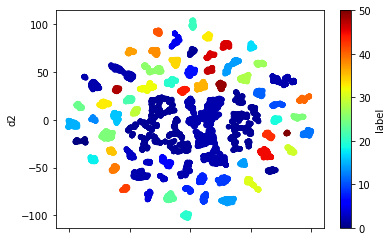

In [144]:
data.normalize('std') \
    .remove_outlires('lof') \
    .reduce('umap', n_components=40) \
    .cluster('prim', cutoff_scale=0.8) \
    .visualize('tsne')

### corelationg with target class

In [145]:
data.normalize('std') \
    .reduce('umap', n_components=40) \
    .cluster('prim', cutoff_scale=0.8) \
    .score('v', label='user')

0.11917660143333487

In [197]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('prim', cutoff_scale=0.8) \
    .score('v', label='class')

0.26226556253458566

## DBSCAN

### outlires removal

In [147]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=40, random_state=i) \
                    .cluster('dbscan', eps=0.5, min_samples=5) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

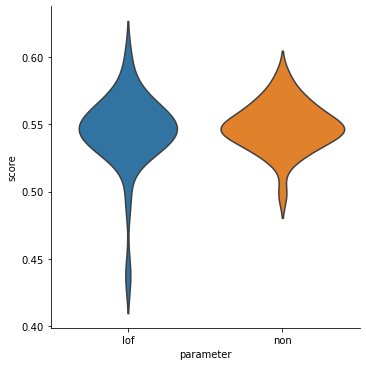

In [148]:
results.plot()

In [149]:
results.mean()

lof    0.544743
non    0.548317
dtype: float64

In [150]:
results.annova()

(0.35888396094878133, 0.5514595675427447)

### Number of dimensions

In [151]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .reduce('umap', n_components=p, random_state=i) \
                    .cluster('dbscan', eps=0.5, min_samples=5) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [5, 10, 20, 30, 40]})

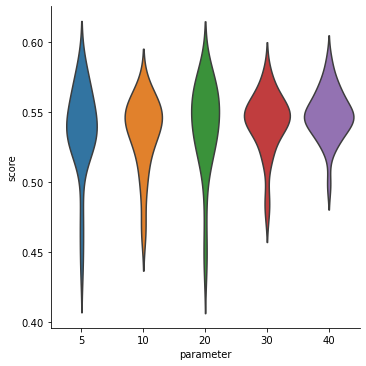

In [152]:
results.plot()

In [153]:
results.mean()

5     0.537036
10    0.534864
20    0.539383
30    0.542612
40    0.548317
dtype: float64

In [154]:
results.annova()

(1.1675086922144973, 0.32764840861740546)

In [155]:
results.scheffe()

,5,10,20,30,40
5,1.000000,0.998785,0.998353,0.956201,0.612471
10,0.998785,1.000000,0.979644,0.866275,0.433952
20,0.998353,0.979644,1.000000,0.994295,0.792961
30,0.956201,0.866275,0.994295,1.000000,0.952504
40,0.612471,0.433952,0.792961,0.952504,1.000000


### Epsilon and Min samples

In [156]:
import itertools
results = Analysis({f'{eps}_{mins}':[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=10, random_state=i) \
                    .cluster('dbscan', eps=eps, min_samples=mins) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for eps, mins in itertools.product([0.25,0.5,0.75], [4,5,6])
})

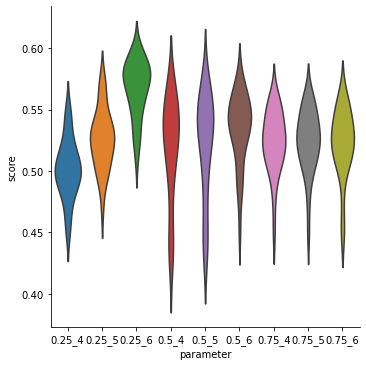

In [157]:
results.plot()

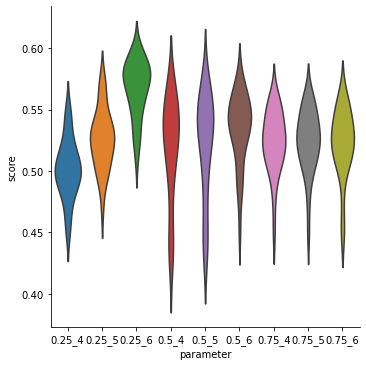

In [158]:
results.plot()

In [159]:
results.mean()

0.25_4    0.501552
0.25_5    0.526114
0.25_6    0.567452
0.5_4     0.518406
0.5_5     0.520902
0.5_6     0.534331
0.75_4    0.523882
0.75_5    0.524525
0.75_6    0.522880
dtype: float64

In [160]:
results.annova()

(10.410074689413262, 1.189203637203762e-12)

In [161]:
results.scheffe()

,0.25_4,0.25_5,0.25_6,0.5_4,0.5_5,0.5_6,0.75_4,0.75_5,0.75_6
0.25_4,1.000000e+00,0.261810,4.841379e-11,0.781026,0.615918,0.024146,0.401927,0.358704,0.472465
0.25_5,2.618102e-01,1.000000,5.755626e-04,0.998207,0.999902,0.997169,1.000000,1.000000,0.999998
0.25_6,4.841379e-11,0.000576,1.000000e+00,0.000008,0.000034,0.021292,0.000180,0.000253,0.000104
0.5_4,7.810257e-01,0.998207,7.662118e-06,1.000000,1.000000,0.832011,0.999858,0.999672,0.999970
0.5_5,6.159176e-01,0.999902,3.396689e-05,1.000000,1.000000,0.931613,0.999999,0.999994,1.000000
0.5_6,2.414593e-02,0.997169,2.129237e-02,0.832011,0.931613,1.000000,0.985351,0.990388,0.973653
0.75_4,4.019266e-01,1.000000,1.796562e-04,0.999858,0.999999,0.985351,1.000000,1.000000,1.000000
0.75_5,3.587045e-01,1.000000,2.531373e-04,0.999672,0.999994,0.990388,1.000000,1.000000,1.000000
0.75_6,4.724650e-01,0.999998,1.040838e-04,0.999970,1.000000,0.973653,1.000000,1.000000,1.000000


### Epsilon

In [162]:
import itertools
results = Analysis({f'{eps}':[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=10, random_state=i) \
                    .cluster('dbscan', eps=eps, min_samples=5) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for eps in [0.25,0.5, 0.75, 0.9] \
})

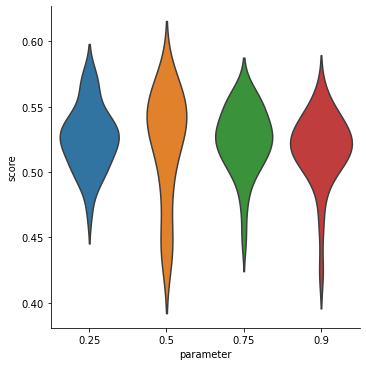

In [163]:
results.plot()

In [164]:
results.mean()

0.25    0.526114
0.5     0.520902
0.75    0.524525
0.9     0.517340
dtype: float64

In [165]:
results.annova()

(0.4934180010863913, 0.6875425520224587)

In [166]:
results.scheffe()

,0.25,0.5,0.75,0.9
0.25,1.000000,0.932311,0.997835,0.744217
0.5,0.932311,1.000000,0.975677,0.976820
0.75,0.997835,0.975677,1.000000,0.842129
0.9,0.744217,0.976820,0.842129,1.000000


### Min Samples

In [167]:
import itertools
results = Analysis({f'{m}':[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=10, random_state=i) \
                    .cluster('dbscan', eps=0.9, min_samples=m) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for m in [4,5,6,7,11] \
})

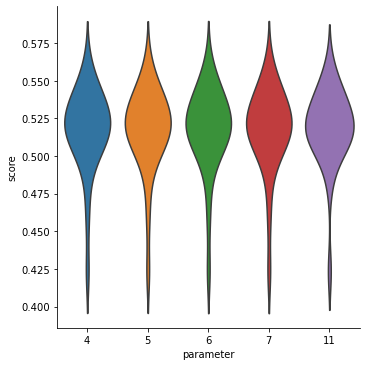

In [168]:
results.plot()

In [169]:
results.mean()

4     0.517340
5     0.517340
6     0.517483
7     0.517483
11    0.519039
dtype: float64

In [170]:
results.annova()

(0.021790896738011007, 0.9990654761903686)

In [171]:
results.scheffe()

,4,5,6,7,11
4,1.000000,1.000000,1.000000,1.000000,0.999571
5,1.000000,1.000000,1.000000,1.000000,0.999571
6,1.000000,1.000000,1.000000,1.000000,0.999697
7,1.000000,1.000000,1.000000,1.000000,0.999697
11,0.999571,0.999571,0.999697,0.999697,1.000000


### Cluster visualisation 

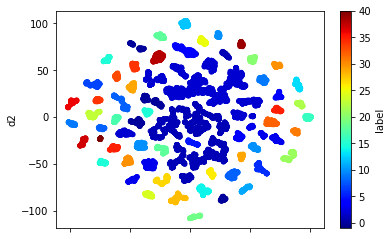

In [172]:
data.normalize('std') \
    .remove_outlires('lof') \
    .reduce('umap', n_components=10) \
    .cluster('dbscan', eps=0.75, min_samples=5) \
    .visualize('tsne')

### corelationg with target class

In [173]:
data.normalize('std') \
    .reduce('umap', n_components=10) \
    .cluster('dbscan', eps=0.75, min_samples=5) \
    .score('v', label='user')

0.11353124827534672

In [181]:
data.normalize('std') \
    .reduce('umap', n_components=10) \
    .cluster('dbscan', eps=0.75, min_samples=5) \
    .score('v', label='class')

0.26150235680206324

## Cross methods

In [175]:
results = Analysis({
   'dbscan':[data.normalize('std') \
                  .remove_outlires('lof') \
                  .reduce('umap', n_components=10, random_state=i) \
                  .cluster('dbscan', eps=0.75, min_samples=5) \
                  .score('silhouette').mean() for i in range(30)], \
    'prim': [data.normalize('std') \
                 .remove_outlires('lof') \
                 .reduce('umap', n_components=40, random_state=i) \
                 .cluster('prim', cutoff_scale=0.8) \
                 .score('silhouette').mean() for i in range(30)], \
    'louvain': [data.normalize('std') \
                 .remove_outlires('lof') \
                 .reduce('umap', n_components=15, random_state=i) \
                 .cluster('louvain', modularity='newman') \
                 .score('silhouette').mean() for i in range(30)], \
    'gmm': [data.normalize('std') \
                 .reduce('umap', n_components=5, random_state=i) \
                 .cluster('gmm', n_components=7) \
                 .score('silhouette').mean() for i in range(30)], \
    'kmeans': [data.normalize('std') \
                 .reduce('umap', n_components=5, random_state=i) \
                 .cluster('kmeans', n_clusters=7) \
                 .score('silhouette').mean() for i in range(30)], \
               
})

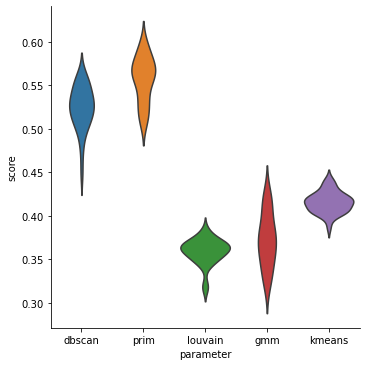

In [176]:
results.plot()

In [177]:
results.mean()

dbscan     0.524525
prim       0.557168
louvain    0.359367
gmm        0.372852
kmeans     0.415944
dtype: float64

In [178]:
results.annova()

(460.7942669158118, 2.4834317057287498e-81)

In [180]:
results.scheffe()

,dbscan,prim,louvain,gmm,kmeans
dbscan,1.000000e+00,1.368535e-05,3.109039e-57,8.693930e-53,8.325540e-37
prim,1.368535e-05,1.000000e+00,4.888324e-67,3.838805e-63,3.633290e-49
louvain,3.109039e-57,4.888324e-67,1.000000e+00,2.737060e-01,1.190713e-14
gmm,8.693930e-53,3.838805e-63,2.737060e-01,1.000000e+00,3.158396e-09
kmeans,8.325540e-37,3.633290e-49,1.190713e-14,3.158396e-09,1.000000e+00
